In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_image(image, nrows, ncols, index, title):
    plt.subplot(nrows, ncols, index)
    plt.imshow(image, cmap="gray")
    plt.title(title)

In [3]:
def gaussian(F, D0):
    M, N = F.shape
    P, Q = M, N
    H = np.zeros((P, Q), dtype=np.float32)
    for u in range(P):
        for v in range(Q):
            D_uv = np.sqrt((u-P/2)**2 + (v - Q/2)**2)
            H[u, v] = np.exp(-((D_uv**2)/ (2 * D0**2)))
    return F * H

In [4]:
def butter_worth(F, D0, n):
    M, N = F.shape
    P, Q = M, N
    H = np.zeros((P, Q), dtype=np.float32)
    for u in range(P):
        for v in range(Q):
            D_uv = np.sqrt((u - P/2)**2 + (v - Q/2)**2)
            H[u, v] = 1 / (1 + (D_uv / D0)**(2*n))
    return F * H

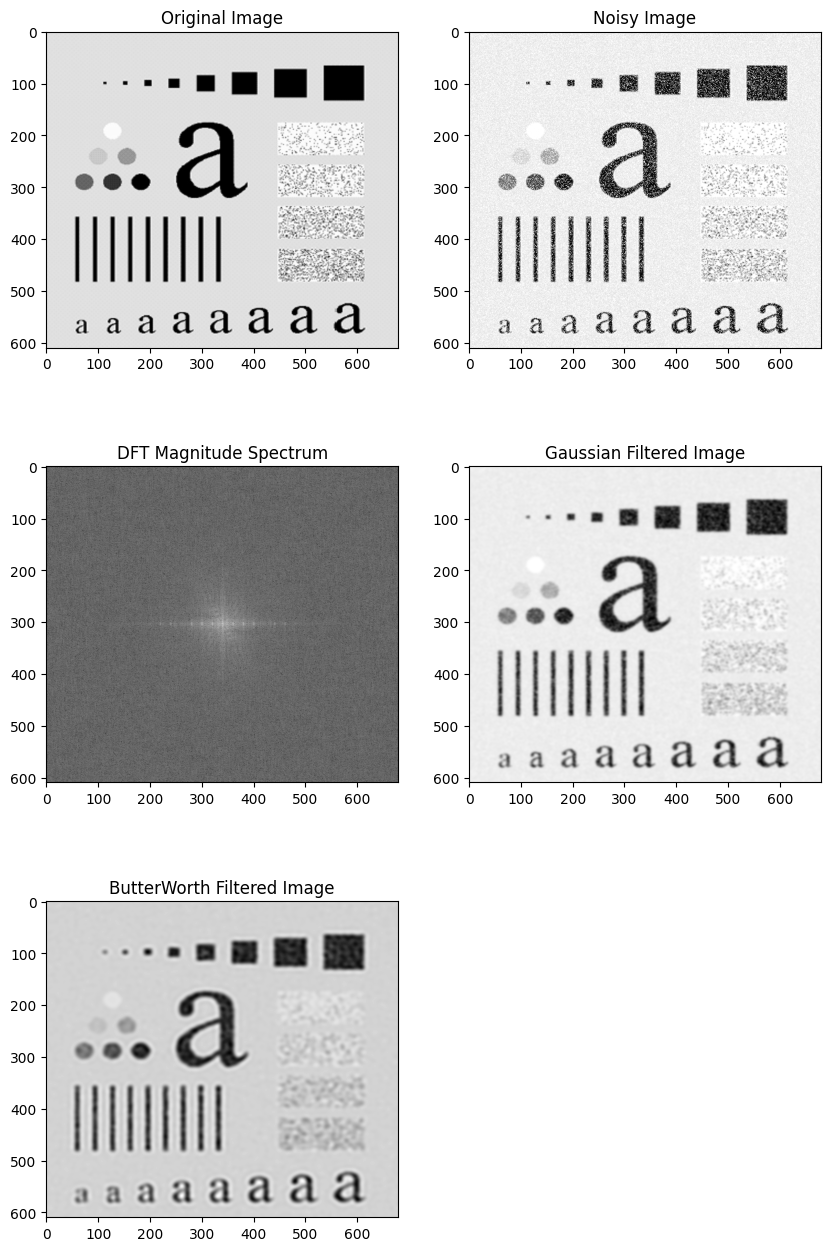

In [11]:
original_image_bgr = cv2.imread("../SrcImage/filteringImage.jpg")
original_image = cv2.cvtColor(original_image_bgr, cv2.COLOR_BGR2GRAY)

# Generate Gaussian Noise
noise = np.random.normal(7, 10, original_image.shape).astype(np.uint8)

# Add this noise to the originale image
noisy_image = cv2.add(original_image, noise)

# Perform FFt on the noisy image 
fft_image = np.fft.fft2(noisy_image)
fft_image_shifted = np.fft.fftshift(fft_image)
magnitude_spectrum = np.log(np.abs(fft_image_shifted) + 1)

plt.figure(figsize=(10, 16))
plot_image(original_image, 3, 2, 1, "Original Image")
plot_image(noisy_image, 3, 2, 2, "Noisy Image")
plot_image(magnitude_spectrum, 3, 2, 3, "DFT Magnitude Spectrum")

g_gaussian = gaussian(fft_image_shifted, 50)
g_butterworth = butter_worth(fft_image_shifted, 50, 4)

reconstructed_image_shifted = np.fft.ifftshift(g_gaussian)
reconstructed_image_shifted_ifft = np.fft.ifft2(reconstructed_image_shifted).real
plot_image(reconstructed_image_shifted_ifft, 3, 2, 4, "Gaussian Filtered Image")

reconstructed_image_shifted = np.fft.ifftshift(g_butterworth)
reconstructed_image_shifted_ifft = np.fft.ifft2(reconstructed_image_shifted).real
plot_image(reconstructed_image_shifted_ifft, 3, 2, 5, "ButterWorth Filtered Image")
